# Praca Domowa 2 
## Jakub Wiśniewski 

## 0. Przygotowanie Danych

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import category_encoders as ce

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [3]:
data.shape

(420020, 14)

## 1. Feature Encoding
### 1.1 One-hot encoding

In [4]:
# W przypadku one-hot encoding (20 pierszych wierszy)

# obiekt enkoder
encoder = ce.one_hot.OneHotEncoder(cols = "it_location")

# dopasowanie do danych
encoder.fit(data.iloc[1:20,:])

# transformujemy ramkę danych
X = encoder.transform(data)
X.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,it_location_7,it_location_8,it_location_9,it_location_10,it_location_11,it_location_12,it_location_13,it_location_14,it_location_15,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"


In [5]:
# dlaczego tylko 20 pierwszych obserwacji?
# bo obliczenie wszystkich kolumn dla pół miliona obserwacji dużo trwa
data.it_location.unique().shape

(10056,)

### 1.2 Target encoding

In [6]:
# Tworzymy obiekt enkodera
encoder = ce.target_encoder.TargetEncoder(cols = "it_location")

In [7]:
# Dopasowujemy go do danych
encoder.fit(data, data[["price"]] )

TargetEncoder(cols=['it_location'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              min_samples_leaf=1, return_df=True, smoothing=1.0, verbose=0)

In [8]:
# Transformujemy nasze dane i łączymy z poprzednią ramką danych, żeby pokazać proces.
X = encoder.transform(data)
X.reset_index(drop = True)

Y = data.merge(X,on = "item_id" )
Y[["price_y", "it_location_x","it_location_y"]].head()

,price_y,it_location_x,it_location_y
0,59.99,Warszawa,85.423398
1,4.90,Warszawa,85.423398
2,109.90,Leszno,61.990914
3,18.50,Wola Krzysztoporska,35.433365
4,19.90,BIAŁYSTOK,117.191956


### 1.3 Wyniki
* `Target Encoding` przypisuje każdej unikalnej wartości z kolumny kategorycznej średnią odpowiadających im wartości z kolumny target. W tym przypadku policzyliśmy średnią cenę (price) produktów w danym mieście (it_location). 
* Dla one-hot encoding byłoby to problematyczne ze względu na dużą ilość unikalnych wartości. Dla tak tużej ramki danych oznaczałoby to duży przyrost czasu potrzebnego do obliczej i pamięci do przechowania 10 tysięcy nowych kolumn.
* Dużo przewagą target encoding w tym przypadku jest połączenie 2 kolumn w jedną. Zamiast abstrakcyjnej dla komputera nazwy dostajemy nową informację odnośnie średnich cen w okolicy, dzięki czemu model może się nauczyć, że w Warszawie ceny są wyższe niż np w Woli Krzysztoporskiej.

## 2 Inne encodery
### 2.1 Ordinal Encoder

In [9]:
# Tworzymy obiekt
encoder = ce.ordinal.OrdinalEncoder(cols = "main_category")

In [10]:
encoder.fit(data)

OrdinalEncoder(cols=['main_category'], drop_invariant=False,
               handle_missing='value', handle_unknown='value',
               mapping=[{'col': 'main_category', 'data_type': dtype('O'),
                         'mapping': Komputery                               1
Odzież, Obuwie, Dodatki                 2
Dom i Ogród                             3
Książki i Komiksy                       4
Biżuteria i Zegarki                     5
RTV i AGD                               6
Motoryzacja                             7
Dla Dzieci                              8
Uroda                                   9
Telefony i Akcesoria                   10
Sport i Turystyka                      11
Delikatesy                             12
Kolekcje                               13
Gry                                    14
Rękodzieło                             15
Zdrowie                                16
Przemysł                               17
Filmy                                  18
Fotografia

In [11]:
X = encoder.transform(data)
X[["price", "it_location","main_category"]].head()

,price,it_location,main_category
0,59.99,Warszawa,1
1,4.90,Warszawa,2
2,109.90,Leszno,3
3,18.50,Wola Krzysztoporska,4
4,19.90,BIAŁYSTOK,2


### 2.2 Wyniki

* `Ordinal encoder` nadaje każdej unikalnej wartości nową kolejną liczbę naturalną. Czyli dla kategorii komputery ma wartość 1, Odzież, Obuwe, Dodatki 2 itd.
* W tym przypadku taki rodzaj encodingu nie ma sensu, gdyż model może zauważyć, że 4>1, czyli, że `Dom i ogród` > `Komputery`, a to jest nieprawdą.
* Gdybyśmy natomiast mielibyśmy wartości typu duży, mały, XXL itp..., to po odpowiednim posortowaniu tych wartości ta skala miałaby sens. Modele nauczyłyby się, że `XXL` > `mały`, co dla nas ma sens. 

### 2.3 BaseN encoder

In [12]:
encoder = ce.basen.BaseNEncoder(cols = "main_category", base = 5)

In [13]:
encoder.fit(data)
X = encoder.transform(data)
X[["price", "it_location","main_category_0", "main_category_1","main_category_2","main_category_3"]]

,price,it_location,main_category_0,main_category_1,main_category_2,main_category_3
0,59.99,Warszawa,0,0,0,1
1,4.90,Warszawa,0,0,0,2
2,109.90,Leszno,0,0,0,3
3,18.50,Wola Krzysztoporska,0,0,0,4
4,19.90,BIAŁYSTOK,0,0,0,2
...,...,...,...,...,...,...
420015,180.00,Kraśnik,0,0,1,1
420016,14.99,Dzierżoniów,0,0,1,4
420017,5.99,Supraśl,0,0,0,2
420018,200.00,Poznań,0,0,1,3


### 2.4 Wyniki 
* `BaseN encoder` to połączenie ordinal i one-hot encodera. Gdy skala ordinal się zapełni (przekroczy wartość base), to zmienia się kodowana kolumna, i ordinal encoder zaczyna działać od nowa.
* Metoda mało intuicyjna
* Dobra dla uporządkowanych danych względem jakiejś metryki main category.

## 3. Imputacja
### 3.1 Uzupełnianie braków

In [31]:
import copy
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [166]:
df = data[["price", "it_seller_rating", "it_quantity"]]
df.head()

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


Wybiorę próbkę wielkości 20% oryginalnych danych, żeby imputowanie nie trwało bardzo długo.

In [167]:
# wybieram randomową próbkę danych równą 
id_array = np.random.choice(df.index,size = round(0.2*df.shape[0]), replace = False)
df_sample = df.iloc[id_array,:].reset_index(drop=True) # 20% of original data

Będziemy imputować zmienną:

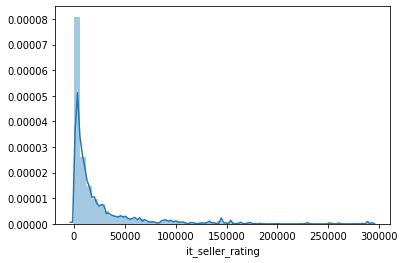

In [91]:
sns.distplot(df.it_seller_rating)

In [127]:
def imput(df,num_iter,columns):
    
    result = np.zeros(num_iter)
    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    for i in range(num_iter):
        
        df_imput = copy.copy(df)
        
        # następnie z próbki wybieram 10% nanów
        id_nans = np.random.choice(df.index,size = round(0.1*df.shape[0]), replace = False)

        # kopiuje do porównania
    
        # zastępuję nanami
        df_imput.loc[id_nans,columns] = np.nan

        # imputuję
        imputer_result = imputer.fit_transform(df_imput)

        # do ramki danych
        result[i] = mean_squared_error(df,pd.DataFrame(imputer_result), squared = False)

    return result

In [179]:
result1 = imput(df_sample, 10,"it_seller_rating")
result1

array([6973.92188696, 7083.44191799, 6662.6133092 , 6935.30771881,
       6949.79984423, 7072.23116259, 7163.4974731 , 6986.73073707,
       7040.62185711, 7179.94031726])

In [181]:
print(f'Median RMSE of the results: {round(np.median(result1),3)} \nStandard RMSE deviation of results:{round(result1.std(),3)}')

Median RMSE of the results: 7013.676 
Standard RMSE deviation of results:139.32


In [180]:
result2 = imput(df_sample, 10, ["it_seller_rating", "it_quantity"])
result2

array([8553.7214269 , 8409.57099357, 8249.54913021, 8551.69165903,
       8588.11973175, 8324.21289886, 8620.8288588 , 8595.56727886,
       8583.45042832, 8612.46752249])

In [182]:
print(f'Median RMSE of the results: {round(np.median(result2),3)} \nStandard RMSE deviation of results:{round(result2.std(),3)}')

Median RMSE of the results: 8568.586 
Standard RMSE deviation of results:125.57


In [203]:
a = np.c_[result1, np.repeat("one column",10)]
b = np.c_[result2, np.repeat("two columns",10)]
c = pd.DataFrame(np.r_[a,b])
c = c.rename(columns = {0:"result",1:"type"})
c.result = pd.to_numeric(c.result)

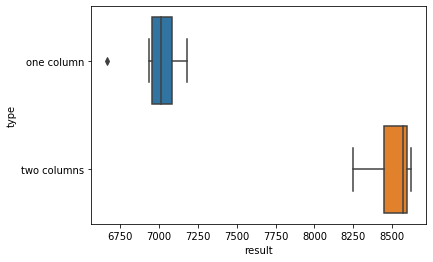

In [212]:
sns.boxplot(x="result", y="type", data=c)

### 3.2 Wnioski:
* Imputacja K najbliższych sąsiadów jest moim zdaniem efektywnym algorytmem. Jak można się spodziewać najlepiej działa dla jak największej ilości danych. Błąd w przypadku braków w tylko jednej kolumnie jest znacznie mniejszy niż w przypadku, gdy braki występują w 2. 
* Algorytm ten ma jednak swoje minusy. Dla dużych danych algorytm wykonuje się długo i wykorzystuje dużo pamięci podręcznej. Byłem zmuszony do zmniejszenia rozmiaru danych do 20% swojego oryginalnego rozmiaru.